<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/Coverage_of_query_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
annotation_overlaps = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_Output.xlsx")

In [8]:
annotation_overlaps

,Prokka,BATH,label
0,k127_922904\t1075\t5760\tCKDIDOFJ_01217\t+\tab...,NaN,Prokka Unannotated
1,k127_922904\t6844\t7872\tCKDIDOFJ_01221\t+\tab...,NaN,Prokka Unannotated
2,k127_922904\t7925\t8473\tCKDIDOFJ_01222\t+\tab...,NaN,Prokka Unannotated
3,k127_922904\t8452\t9081\tCKDIDOFJ_01223\t+\tab...,NaN,Prokka Unannotated
4,k127_922904\t11548\t13251\tCKDIDOFJ_01225\t+\t...,NaN,Prokka Unannotated
...,...,...,...
946,k127_795063\t42549\t44189\tCKDIDOFJ_01718\t+\t...,k127_795063\t42894\t43517\tQ8G6Z9\t+\t5,BATH and Prokka Unannotated
947,k127_795063\t45264\t46460\tCKDIDOFJ_01720\t+\t...,k127_795063\t45273\t46430\tP0DPE4\t+\t0,BATH and Prokka Annotated
948,k127_795063\t46484\t47611\tCKDIDOFJ_01721\t+\t...,k127_795063\t46493\t47560\tP06710\t+\t0,BATH and Prokka Annotated
949,k127_795063\t48414\t49769\tCKDIDOFJ_01723\t+\t...,k127_795063\t48831\t49277\tQ9WYH1\t+\t0,BATH and Prokka Unannotated


In [9]:
import re

def extract_info(row):
    if pd.notnull(row['BATH']):
        bath_data = re.split(r'\t|\s+', str(row['BATH']))
        row['BATH_contig'] = bath_data[0]
        if len(bath_data) >= 3:
            row['BATH_annot'] = bath_data[-3]
        else:
            row['BATH_annot'] = None

    if pd.notnull(row['Prokka']):
        prokka_data = re.split(r'\t|\s+', str(row['Prokka']))
        row['Prokka_contig'] = prokka_data[0]
        if len(prokka_data) >= 3:
            row['Prokka_annot'] = prokka_data[3]
        else:
            row['Prokka_annot'] = None
    return row


annotation_overlaps = annotation_overlaps.apply(extract_info, axis=1)

In [10]:
bath_file = pd.read_excel("/content/bin82_BATH_deduplicated-2.xlsx")

In [11]:
annotation_overlapsmerged_df = pd.merge(annotation_overlaps, bath_file,
                     left_on=['BATH_contig', 'BATH_annot'],
                     right_on=['target name', 'query name'],
                     how='left')

In [12]:
annotation_overlapsmerged_df.columns

Index(['BATH', 'BATH_annot', 'BATH_contig', 'Prokka', 'Prokka_annot',
       'Prokka_contig', 'label', 'Unnamed: 0', 'target name', 'accession',
       'query name', 'accession1', 'hmm len', 'hmm from', 'hmm to', 'seq len',
       'ali from', 'ali to', 'env from', 'env to', 'E-value', 'score', 'bias',
       'shifts', 'stops', 'pipe', 'description of target', 'extra', 'strand',
       'ali from flip', 'ali to flip', 'origin'],
      dtype='object')

In [13]:
annotation_overlapsmerged_df['hmm coverage'] = (annotation_overlapsmerged_df['hmm to'] - annotation_overlapsmerged_df['hmm from']+1)/annotation_overlapsmerged_df['hmm len'] * 100

<ipython-input-14-f5c075a05632>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='hmm coverage', data=annotation_overlapsmerged_df, inner=None, palette='light:r')


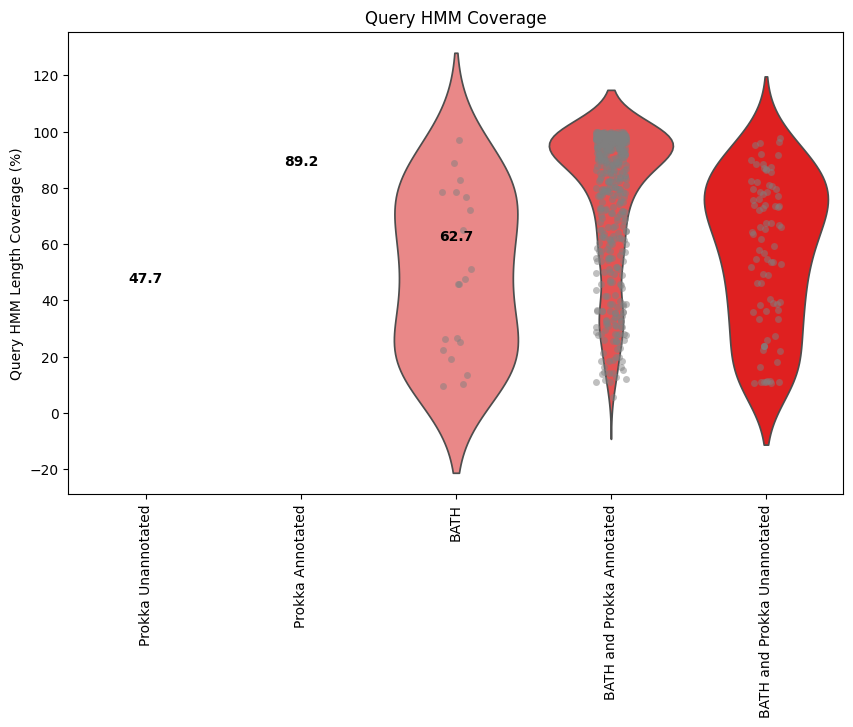

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='hmm coverage', data=annotation_overlapsmerged_df, inner=None, palette='light:r')
sns.stripplot(x='label', y='hmm coverage', data=annotation_overlapsmerged_df, color='grey', alpha=0.5)
medians = annotation_overlapsmerged_df.groupby(['label'])['hmm coverage'].median()
for idx, median in enumerate(medians):
    plt.text(idx, median, f'{median:.1f}', ha='center', va='center', color='black', fontweight='bold')


plt.title('Query HMM Coverage')
plt.xlabel('')
plt.ylabel('Query HMM Length Coverage (%)')
plt.xticks(rotation=90)
plt.show()

In [15]:
annotation_overlapsmerged_df['start nearness'] = (annotation_overlapsmerged_df['hmm from']-1)/annotation_overlapsmerged_df['hmm len'] * 100

<ipython-input-16-bcc2737266c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='start nearness', data=annotation_overlapsmerged_df, inner=None, palette='light:g')


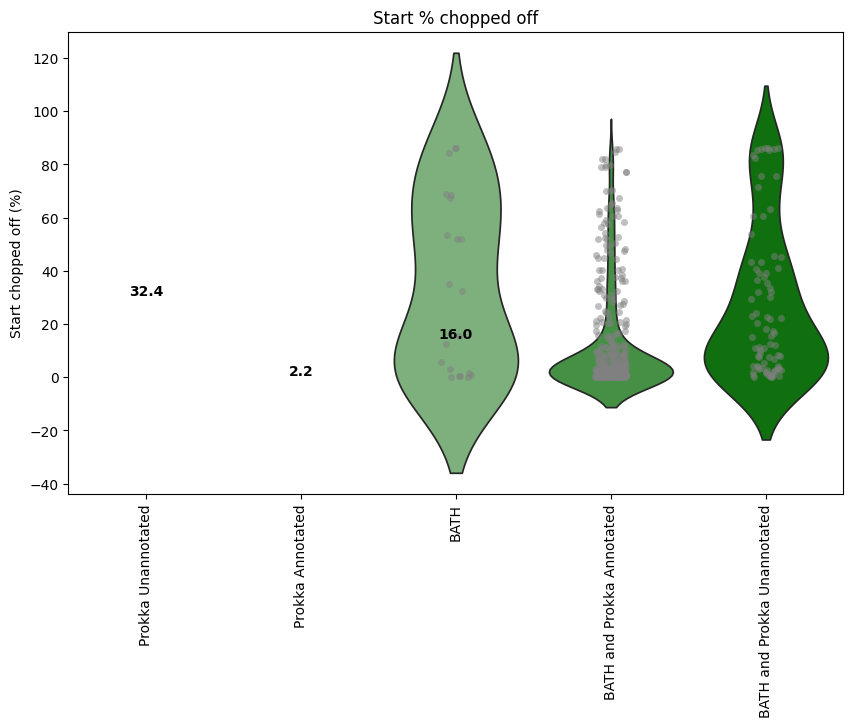

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='start nearness', data=annotation_overlapsmerged_df, inner=None, palette='light:g')
sns.stripplot(x='label', y='start nearness', data=annotation_overlapsmerged_df, color='grey', alpha=0.5)
medians = annotation_overlapsmerged_df.groupby(['label'])['start nearness'].median()
for idx, median in enumerate(medians):
    plt.text(idx, median, f'{median:.1f}', ha='center', va='center', color='black', fontweight='bold')


plt.title('Start % chopped off')
plt.xlabel('')
plt.ylabel('Start chopped off (%)')
plt.xticks(rotation=90)
plt.show()